# Expression of P(G_n) in terms of M_n and M_{n+2}

In this notebook we'll validate the expression for P(G_n) in terms of r,
b, and M_n and M_{n+2}

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as pl
%matplotlib notebook
epsabs = 1e-12
epsrel = 1e-12

Here is the original expression for P(G_n) as defined in the text:

In [3]:
def P_of_Gn(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n *(r-b+2*b*np.sin(x)**2)
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return 2*r*np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n *(r-b+2*b*np.sin(x)**2)
        res, err = quad(func,-np.pi/2,np.pi/2,epsabs=epsabs,epsrel=epsrel)
        return 2*r*np.sqrt(4*b*r)**n*res
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

And here is the expression for the integral M_n:

In [4]:
def M_n(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n
        res, err = quad(func,-np.pi/2,np.pi/2,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

/Users/ericagol/anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


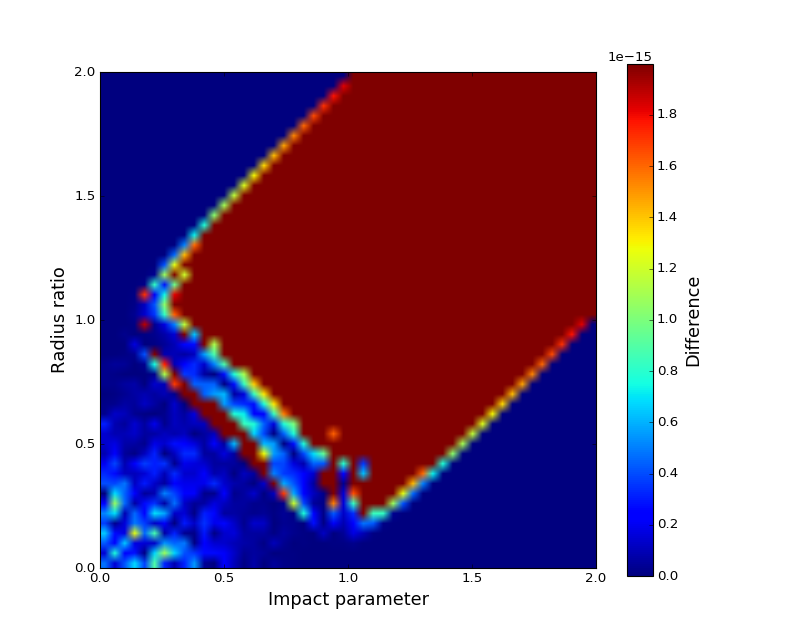

<IPython.core.display.Javascript object>


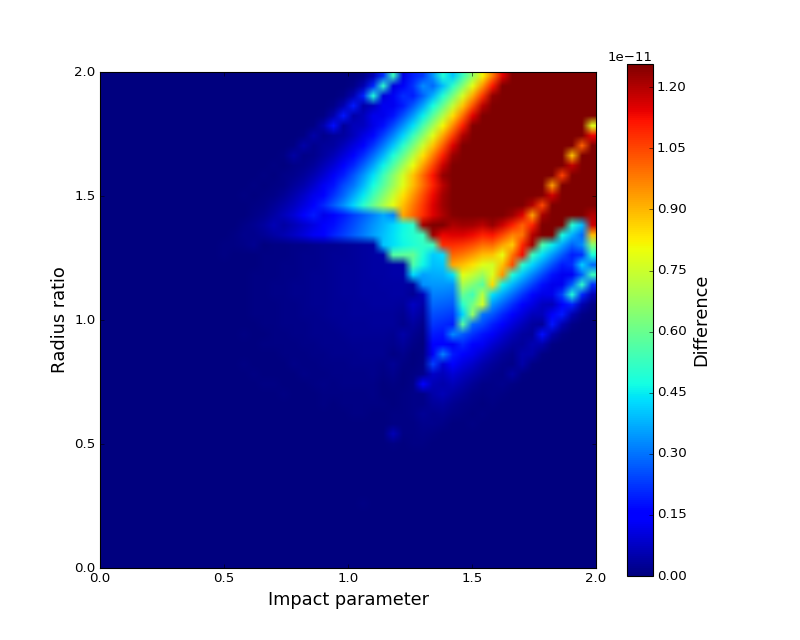

<IPython.core.display.Javascript object>


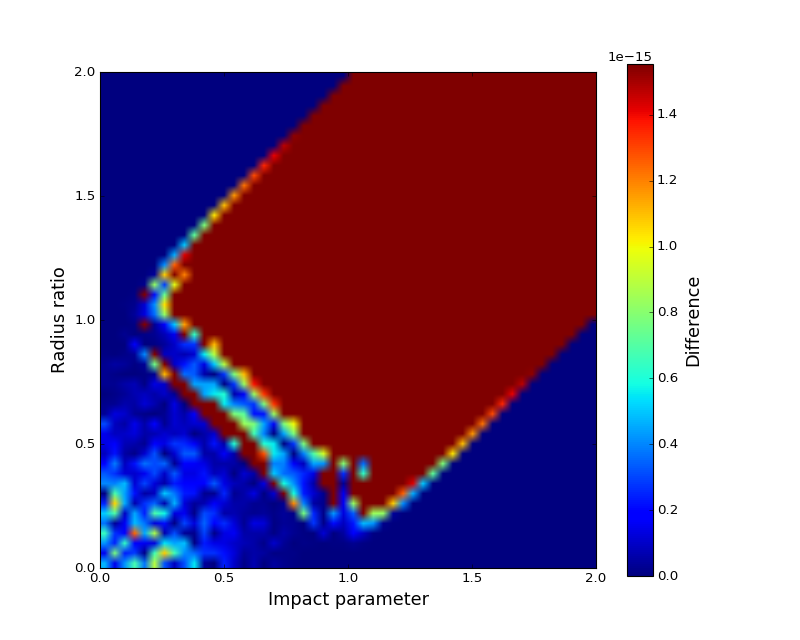

<IPython.core.display.Javascript object>


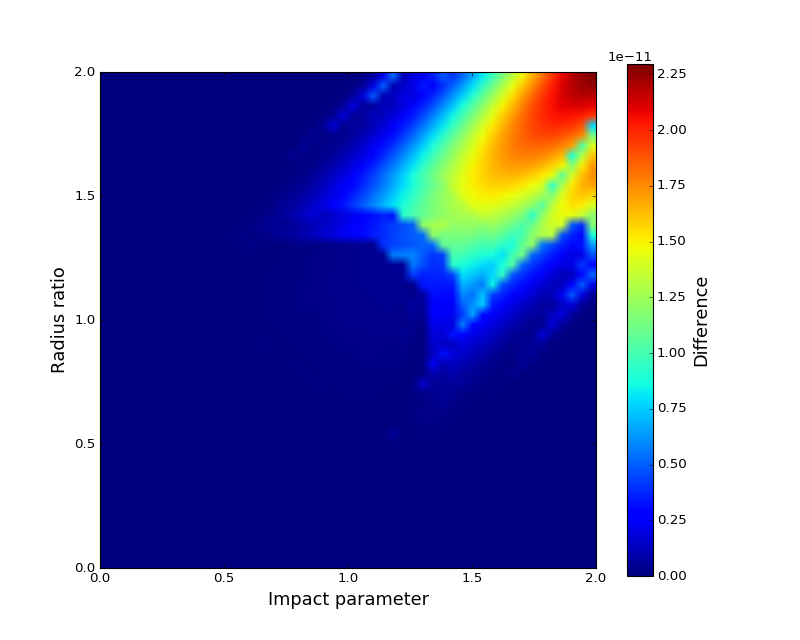

In [8]:
n = 50
barr = np.linspace(1e-4, 2, n)
rarr = np.linspace(1e-4, 2, n)
diff = np.zeros((n, n))
Nu_grid = np.linspace(4,7,4)
# Nu is the order of the integral:
for k, Nu in enumerate(Nu_grid):
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            diff[j, i] = abs(P_of_Gn(r, b, Nu) - 2*r*r*M_n(r,b,Nu)+
                    Nu/(Nu+2)*((1-r*r-b*b)*M_n(r,b,Nu)+(1-(b-r)**2)*((b+r)**2-1)*M_n(r,b,Nu-2)))
    fig = pl.figure(figsize=(10, 8))
    pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
    pl.xlabel("Impact parameter", fontsize=16)
    pl.ylabel("Radius ratio", fontsize=16)
    cb = pl.colorbar()
    cb.ax.set_ylabel("Difference", fontsize=16);

The difference is numerically precise everywhere, so our expression is correct.